# Constraint analysis of individual wind farms

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('2019_scottish_wind_farms.csv')
df.index = pd.to_datetime(df['Dates_[UTC]'])
df.drop(columns=['Dates_[UTC]'], inplace=True)
df_energy = df.iloc[:,:11]
df_cost = df.iloc[:,11:]
df

,T_WHILW-1_Energy_[MWh],T_WHILW-2_Energy_[MWh],T_BLLA-1_Energy_[MWh],T_BLLA-2_Energy_[MWh],T_CLDCW-1_Energy_[MWh],T_CLDNW-1_Energy_[MWh],T_CLDSW-1_Energy_[MWh],T_CRYRW-2_Energy_[MWh],T_CRYRW-3_Energy_[MWh],T_HADHW-1_Energy_[MWh],...,T_WHILW-2_Payment_[GBP],T_BLLA-1_Payment_[GBP],T_BLLA-2_Payment_[GBP],T_CLDCW-1_Payment_[GBP],T_CLDNW-1_Payment_[GBP],T_CLDSW-1_Payment_[GBP],T_CRYRW-2_Payment_[GBP],T_CRYRW-3_Payment_[GBP],T_HADHW-1_Payment_[GBP],T_KLGLW-1_Payment_[GBP]
Dates_[UTC],,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,-55.9250,0.0,0.0,-26.4750,0.0,0.0,0.0,0.0,0.0,-35.4083,...,0.0,0.0,1688.90,0.0,0.0,0.0,0.0,0.0,2209.40,6829.48
2019-01-01 00:30:00+00:00,-42.2333,0.0,0.0,-24.5333,0.0,0.0,0.0,0.0,0.0,-30.4250,...,0.0,0.0,1565.03,0.0,0.0,0.0,0.0,0.0,1898.46,6637.57
2019-01-01 01:00:00+00:00,-31.6750,0.0,0.0,-23.0250,0.0,0.0,0.0,0.0,0.0,-26.4333,...,0.0,0.0,1468.81,0.0,0.0,0.0,0.0,0.0,1649.38,6571.65
2019-01-01 01:30:00+00:00,-3.3917,0.0,0.0,-21.5250,0.0,0.0,0.0,0.0,0.0,-22.4333,...,0.0,0.0,1373.13,0.0,0.0,0.0,0.0,0.0,1399.79,6476.50
2019-01-01 02:00:00+00:00,0.0000,0.0,0.0,-20.0250,0.0,0.0,0.0,0.0,0.0,-18.4416,...,0.0,0.0,1277.44,0.0,0.0,0.0,0.0,0.0,1150.72,6223.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00+00:00,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2019-12-31 22:00:00+00:00,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2019-12-31 22:30:00+00:00,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [3]:
table = pd.concat([pd.DataFrame(data=df_energy.sum().values * -1), pd.DataFrame(data=df_cost.sum().values)], axis=1)
table.columns = ['Curtailment energy (MWh)', 'Curtailment cost (£)']
table.index = df_energy.columns[:11].str[:-13]
table['Curtailment energy (MWh)'] = round(table['Curtailment energy (MWh)'], 1)
table['Curtailment cost (£m)'] = round(table['Curtailment cost (£)'] / 1000000, 3)
table['Cost (£) / Curtailment (MWh)'] = round(table['Curtailment cost (£)'] / table['Curtailment energy (MWh)'], 1)
#  round(table['Curtailment energy (MWh)'], 1)
table.drop(index=['T_CRYRW-3'], columns=['Curtailment cost (£)'])

,Curtailment energy (MWh),Curtailment cost (£m),Cost (£) / Curtailment (MWh)
T_WHILW-1,92740.9,6.726,72.5
T_WHILW-2,83691.1,5.782,69.1
T_BLLA-1,42039.2,2.946,70.1
T_BLLA-2,34023.0,2.191,64.4
T_CLDCW-1,83614.3,5.968,71.4
T_CLDNW-1,93451.0,6.655,71.2
T_CLDSW-1,31519.1,2.304,73.1
T_CRYRW-2,15985.0,1.375,86.0
T_HADHW-1,65393.4,4.167,63.7
T_KLGLW-1,213258.2,13.724,64.4


<AxesSubplot:ylabel='Total curtailed energy (MWh)'>

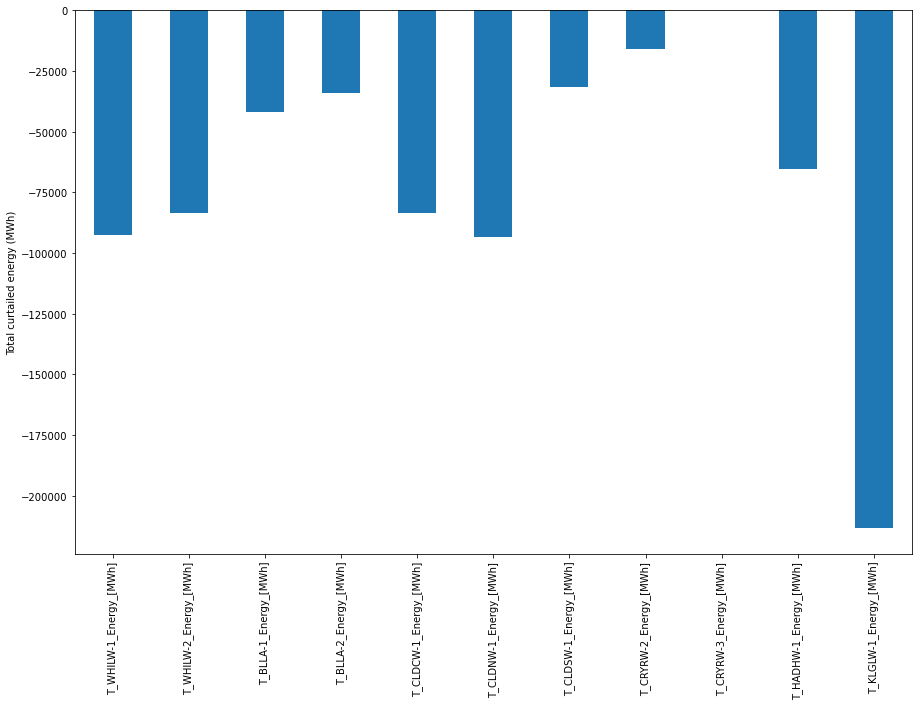

In [4]:
df.iloc[:,:11].sum().plot.bar(figsize=(15,10), ylabel='Total curtailed energy (MWh)')

In [5]:
capacity_MW = {'T_WHILW-1_Energy_[MWh]': 305,
               'T_WHILW-2_Energy_[MWh]': 206,
               'T_BLLA-1_Energy_[MWh]': 118,
               'T_BLLA-2_Energy_[MWh]': 69,
               'T_CLDCW-1_Energy_[MWh]': 225.4,
               'T_CLDNW-1_Energy_[MWh]': 197.8,
               'T_CLDSW-1_Energy_[MWh]': 197.8,
               'T_CRYRW-2_Energy_[MWh]': 138,
               'T_CRYRW-3_Energy_[MWh]': 13.8,
               'T_HADHW-1_Energy_[MWh]': 130,
               'T_KLGLW-1_Energy_[MWh]': 228}

# note that T_HADHW-1 was offline 01/09/2019-30/11/2019 

hours_curtailed = {}
percent_curtailed = {}
per_MW_curtailed = {}
# Count number of non-zeros in all columns of Dataframe
for column_name in df_energy.columns:
    column = df_energy[column_name]
    # Get the count of Zeros in column 
    count = (column < 0).sum()
    hours_curtailed[column_name] = count / 2
    percent_curtailed[column_name] = round(count * 100 / (2 * 8760), 2)
    per_MW_curtailed[column_name] = -1 * column.sum() / capacity_MW[column_name]
df_data = pd.DataFrame(data=[hours_curtailed, percent_curtailed, per_MW_curtailed],
                       index = ['Hours curtailed', 'Percentage curtailed', 'Curtailed (MWh) / MW of capacity'])

Average hours curtailed across 10 large wind farms near Scotland/England boundary:  686.9


<AxesSubplot:ylabel='Hours curtailed'>

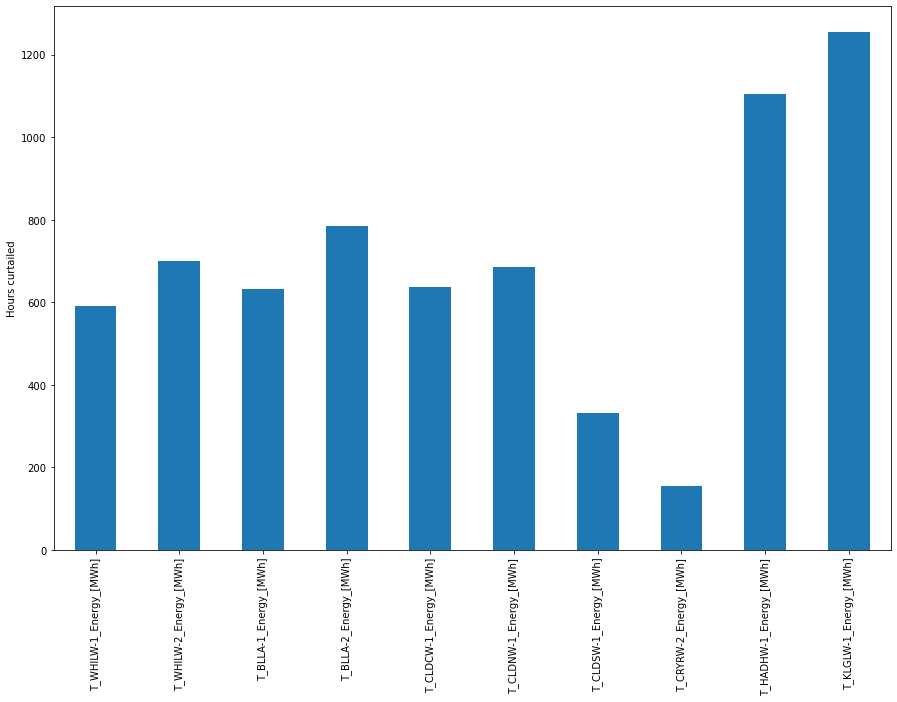

In [6]:
df_data2 = df_data.drop(columns=['T_CRYRW-3_Energy_[MWh]'])
average_hours_curtailed = df_data2.loc['Hours curtailed'].sum() / 10
print('Average hours curtailed across 10 large wind farms near Scotland/England boundary: ', average_hours_curtailed)
df_data2.loc['Hours curtailed'].plot.bar(figsize=(15,10), ylabel='Hours curtailed')

<AxesSubplot:ylabel='Percent of year curtailed'>

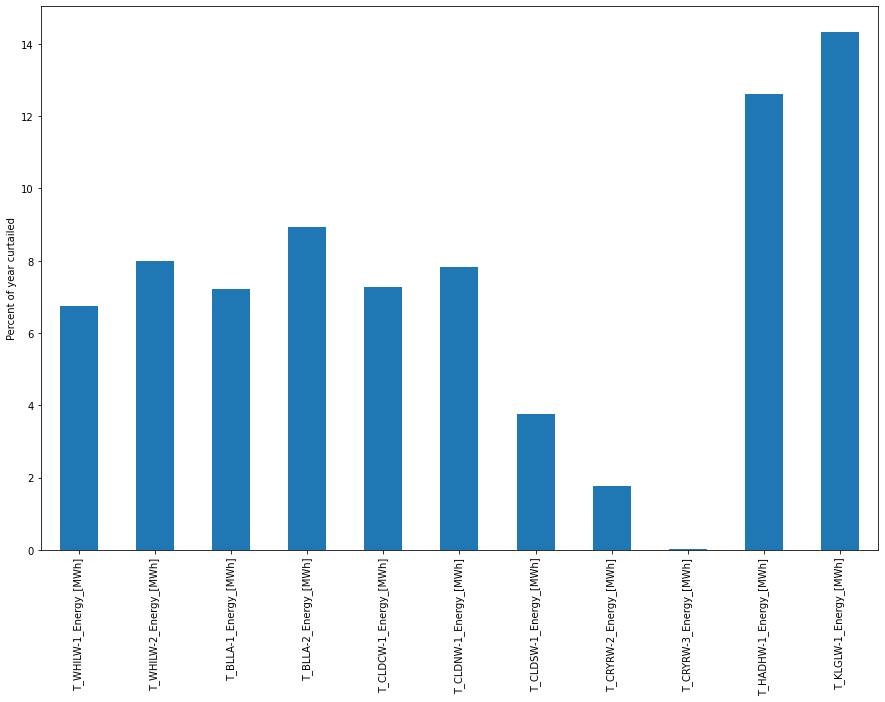

In [7]:
df_data.loc['Percentage curtailed'].plot.bar(figsize=(15,10), ylabel='Percent of year curtailed')

<AxesSubplot:ylabel='Curtailed (MWh) / MW of capacity'>

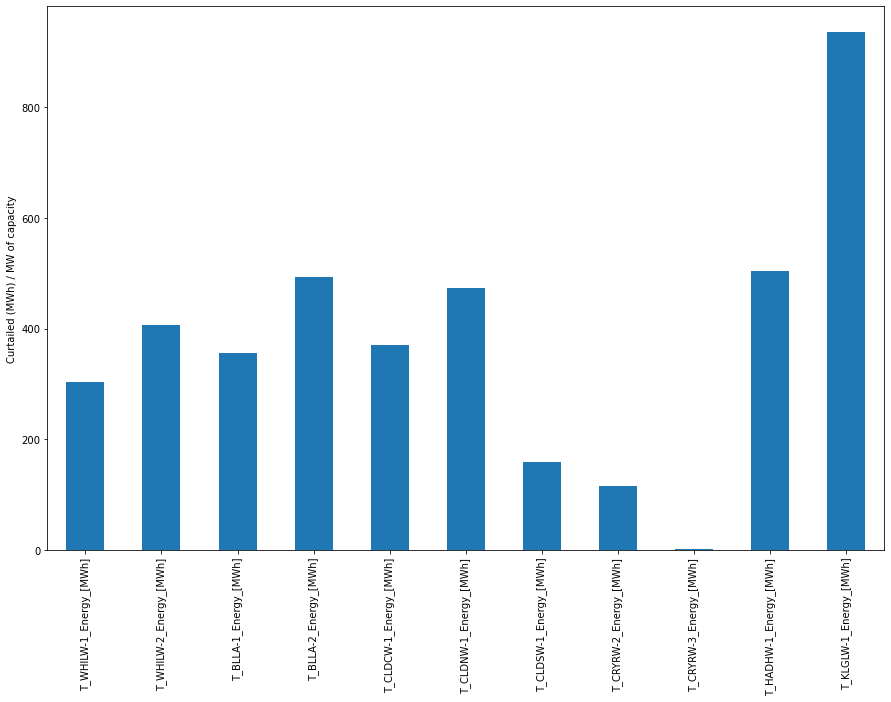

In [8]:
df_data.loc['Curtailed (MWh) / MW of capacity'].plot.bar(figsize=(15,10), ylabel='Curtailed (MWh) / MW of capacity')

## Black Law Windfarm Extension Analysis

<AxesSubplot:title={'center':'Black Law Windfarm Extension Curtailment January 2019'}, xlabel='Dates_[UTC]', ylabel='Curtailed energy (MWh)'>

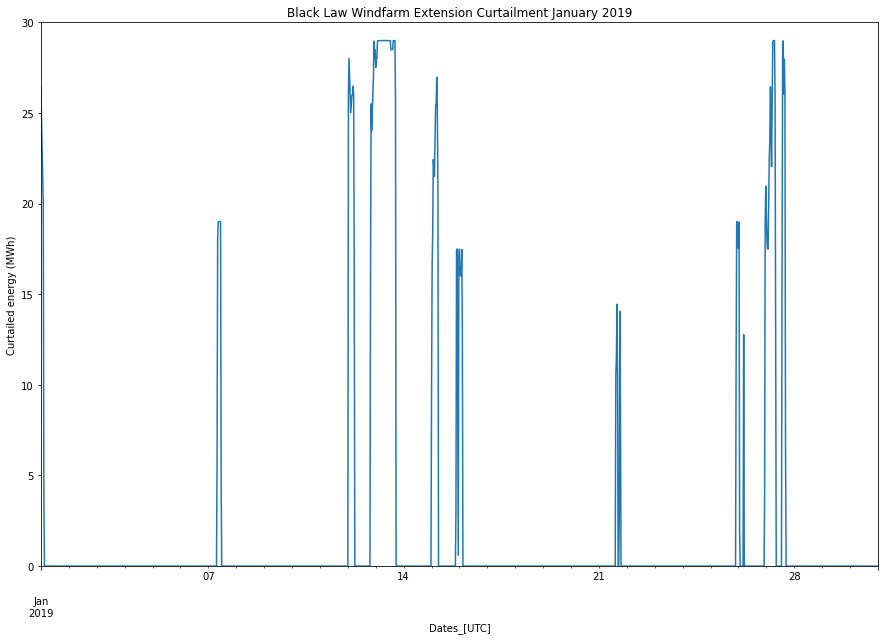

In [9]:
df_black_law_ext = df[['T_BLLA-2_Energy_[MWh]', 'T_BLLA-2_Payment_[GBP]']] * -1

start = '2019-01-01 00:00:00+00:00'
end = '2019-01-31 00:00:00+00:00'
df_black_law_ext['T_BLLA-2_Energy_[MWh]'][start:end].plot(figsize=(15,10), ylabel='Curtailed energy (MWh)',
                                                          title='Black Law Windfarm Extension Curtailment January 2019',
                                                          ylim=[0, 30])

In [10]:
capacity = 69
capacity_factor = 0.3
expected_output = capacity * capacity_factor * 8760
expected_output

181332.0

In [11]:
curtailed = df['T_BLLA-2_Energy_[MWh]'].sum() * -1
curtailed

34023.0148

In [12]:
curtailment_percentage = round(100 * curtailed / expected_output, 2)
curtailment_percentage

18.76

In [13]:
34/181

0.1878453038674033

## Whitelee Windfarm Extension Analysis

<AxesSubplot:title={'center':'Whitelee Wind Farm Curtailment March 2019'}, xlabel='Dates_[UTC]', ylabel='Curtailed energy (MWh)'>

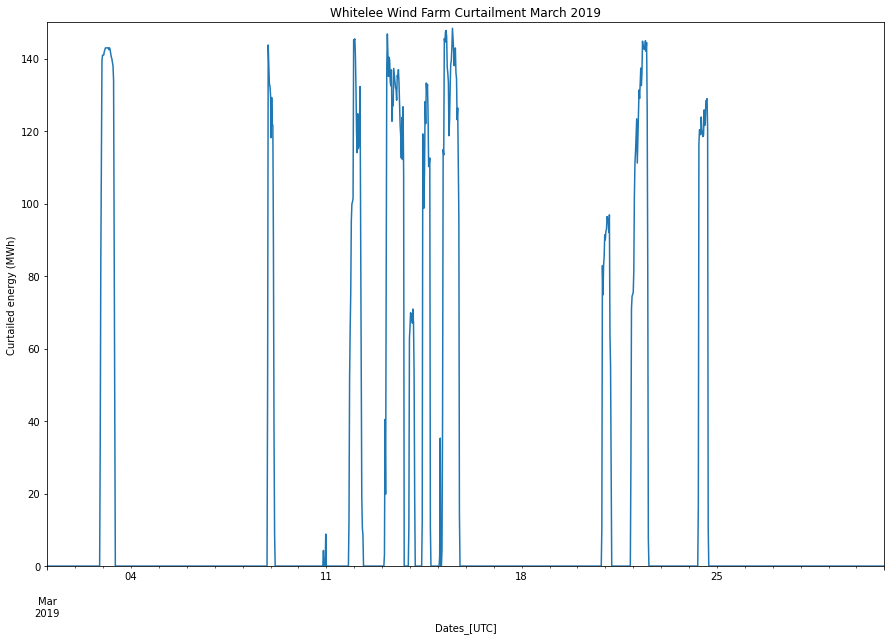

In [14]:
df_whitelee = df[['T_WHILW-1_Energy_[MWh]', 'T_WHILW-1_Payment_[GBP]']] * -1

start = '2019-03-01 00:00:00+00:00'
end = '2019-03-31 00:00:00+00:00'
df_whitelee['T_WHILW-1_Energy_[MWh]'][start:end].plot(figsize=(15,10), ylabel='Curtailed energy (MWh)',
                                                             title='Whitelee Wind Farm Curtailment March 2019',
                                                             ylim=[0, 150])